In [1]:
import cv2
from keras.models import load_model
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical

In [2]:
image_directory='datasets/'

In [3]:
no_ICH_images=os.listdir(image_directory+ 'no/')
yes_ICH_images=os.listdir(image_directory+ 'yes/')

In [4]:
dataset=[]
label=[]
INPUT_SIZE=64

In [5]:
for i, image_name in enumerate(no_ICH_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
for i, image_name in enumerate(yes_ICH_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [6]:
print(len(dataset))
print(len(label))

3000
3000


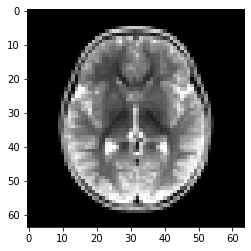

In [7]:
plt.imshow(dataset[0], cmap='gray')

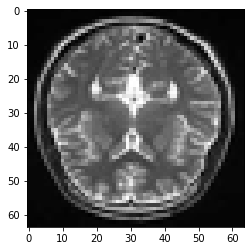

In [8]:
plt.imshow(dataset[100], cmap='gray')

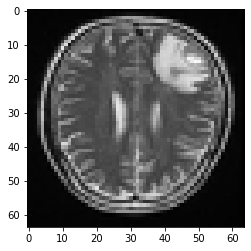

In [9]:
plt.imshow(dataset[2999], cmap='gray')

In [10]:
dataset=np.array(dataset)
label=np.array(label)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2, random_state=0)

In [13]:
print(x_train.shape)
print(y_train.shape)

(2400, 64, 64, 3)
(2400,)


In [14]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [15]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [16]:
y_train=to_categorical(y_train, num_classes=2)
y_test=to_categorical(y_test, num_classes=2)

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(32,(3,3), input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [22]:
#BinaryCrossentropy=1, sigmoid
#Categorical Cross Entropy=2, softmax

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=16, verbose=1, epochs=10, validation_data=(x_test,y_test),shuffle=False)

Epoch 1/10
150/150 [==============================] - 8s 44ms/step - loss: 0.5570 - accuracy: 0.7258 - val_loss: 0.4633 - val_accuracy: 0.7750
Epoch 2/10
150/150 [==============================] - 7s 44ms/step - loss: 0.4272 - accuracy: 0.8192 - val_loss: 0.3725 - val_accuracy: 0.8383
Epoch 3/10
150/150 [==============================] - 7s 43ms/step - loss: 0.3239 - accuracy: 0.8683 - val_loss: 0.2932 - val_accuracy: 0.8700
Epoch 4/10
150/150 [==============================] - 7s 43ms/step - loss: 0.2550 - accuracy: 0.8996 - val_loss: 0.2641 - val_accuracy: 0.8717
Epoch 5/10
150/150 [==============================] - 7s 44ms/step - loss: 0.1797 - accuracy: 0.9354 - val_loss: 0.1753 - val_accuracy: 0.9417
Epoch 6/10
150/150 [==============================] - 7s 44ms/step - loss: 0.1275 - accuracy: 0.9538 - val_loss: 0.1377 - val_accuracy: 0.9533
Epoch 7/10
150/150 [==============================] - 6s 43ms/step - loss: 0.0856 - accuracy: 0.9712 - val_loss: 0.1261 - val_accuracy: 0.9617

In [81]:
model.save('ICH10EpochsCategorical.h5')

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

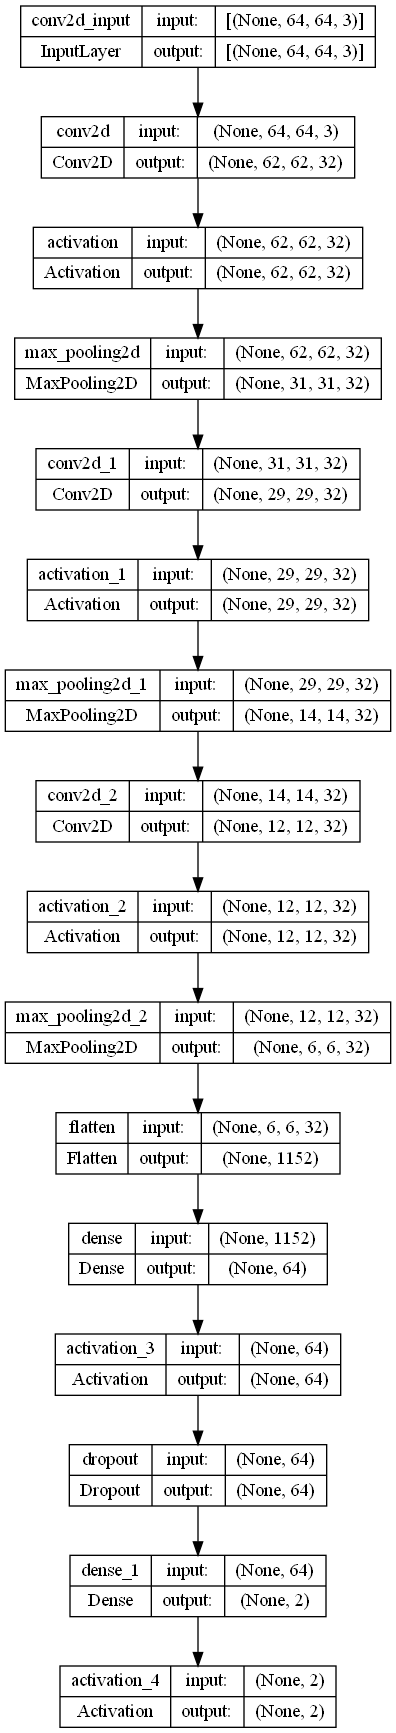

In [26]:
from tensorflow.keras.utils import plot_model 
plot_model(model,show_shapes=True,expand_nested=True)

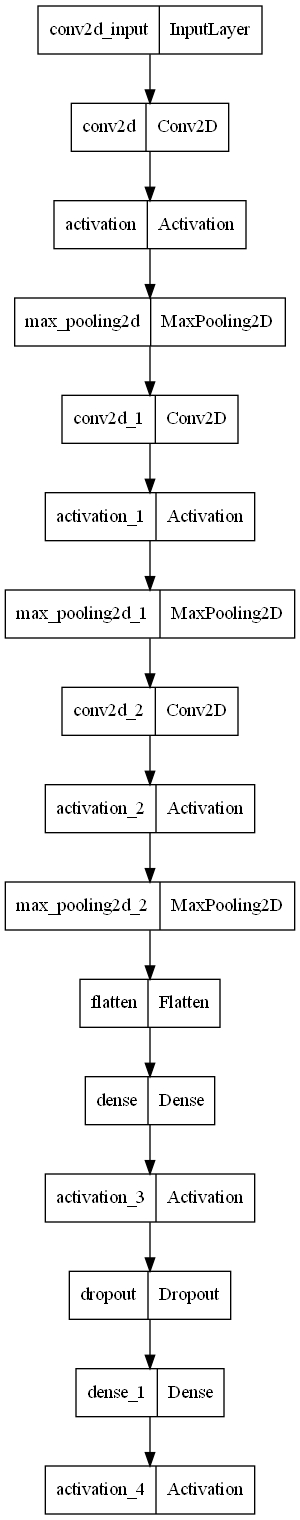

In [27]:
plot_model(
    model, to_file='model.png',show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

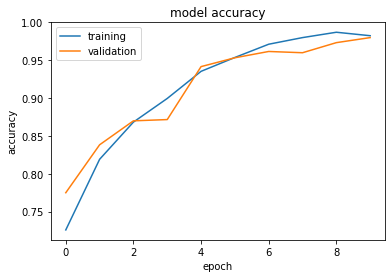

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

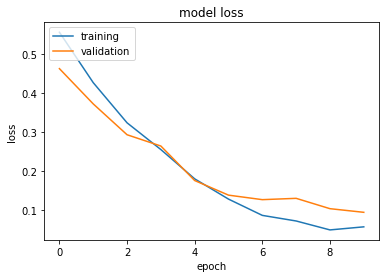

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

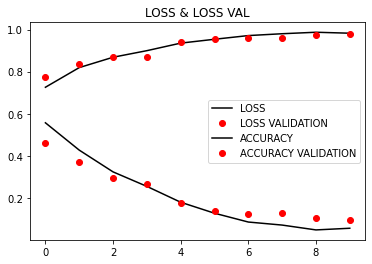

In [31]:
plt.plot(history.history['loss'],"k-",label="LOSS")
plt.plot(history.history['val_loss'],"ro",label="LOSS VALIDATION")
plt.plot(history.history['accuracy'],"k-",label="ACCURACY")
plt.plot(history.history['val_accuracy'],"ro",label="ACCURACY VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.legend()
plt.show()

19/19 [==============================] - 1s 21ms/step


<AxesSubplot:>

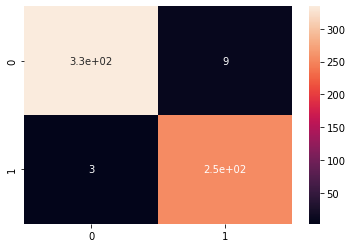

In [32]:
import seaborn as sns
y_pred= model.predict(x_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm,annot=True)

In [34]:
type(no_ICH_images)

list

In [35]:
model=load_model('BrainTumor10EpochsCategorical.h5')

In [36]:
image=cv2.imread('C:\\Users\\Narainder Singh\\Desktop\\pred\\pred0.jpg')

In [37]:
img=Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)
input_img=np.expand_dims(img, axis=0)

In [38]:
result = model.predict(input_img)
result_final=np.argmax(result,axis=1)
print(result_final)

1/1 [==============================] - 0s 107ms/step
[0]


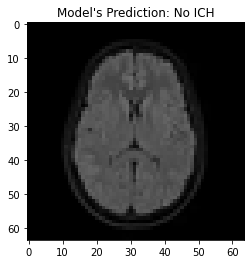

In [39]:
dec={0:"Model's Prediction: No ICH", 1:"Model's Prediction:Positive ICH"}
plt.title(dec[result_final[0]])
plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 29ms/step
[0]


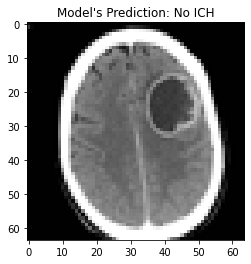

In [87]:
image=cv2.imread('C:\\Users\\Narainder Singh\\Desktop\\pred\\pred10.jpg')
img=Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)
input_img=np.expand_dims(img, axis=0)
result = model.predict(input_img)
result_final=np.argmax(result,axis=1)
print(result_final)
dec={0:"Model's Prediction: No ICH", 1:"Model's Prediction:Positive ICH"}
plt.title(dec[result_final[0]])
plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 17ms/step
[0]


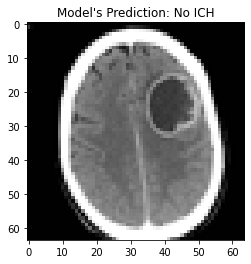

In [73]:
image=cv2.imread('C:\\Users\\Narainder Singh\\Desktop\\pred\\pred10.jpg')
img=Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)
input_img=np.expand_dims(img, axis=0)
result = model.predict(input_img)
result_final=np.argmax(result,axis=1)
print(result_final)
dec={0:"Model's Prediction: No ICH", 1:"Model's Prediction:Positive ICH"}
plt.title(dec[result_final[0]])
plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 18ms/step
[0]


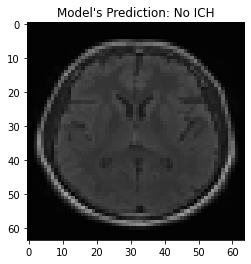

In [58]:
image=cv2.imread('C:\\Users\\Narainder Singh\\Desktop\\pred\\pred3.jpg')
img=Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)
input_img=np.expand_dims(img, axis=0)
result = model.predict(input_img)
result_final=np.argmax(result,axis=1)
print(result_final)
dec={0:"Model's Prediction: No ICH", 1:"Model's Prediction:Positive ICH"}
plt.title(dec[result_final[0]])
plt.imshow(img, cmap='gray')

In [43]:
pred_images=os.listdir( 'pred/')

In [44]:
df=pd.DataFrame(pred_images)

In [45]:
my_data=[0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1]

In [46]:
df['Prediction']=my_data

<AxesSubplot:xlabel='Prediction', ylabel='count'>

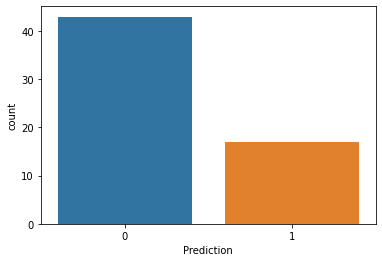

In [47]:
sns.countplot(x='Prediction',data=df)

C:\Users\Narainder Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prediction', ylabel='Density'>

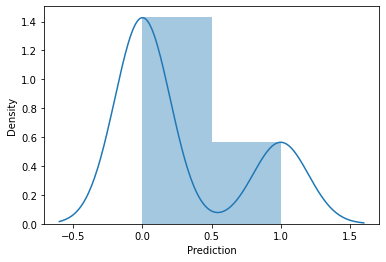

In [48]:
sns.distplot(df['Prediction'])